 # Situación problemática
 Hagan una pequeña investigación del tema para tener una idea de qué buscar en un análisis exploratorio. En el caso de los problemas médicos, describan la enfermedad a detectar, los síntomas y como se diagnostica (especialmente diagnóstico basado en imágenes). Esto les va a servir para entender cual es el patrón que deben reconocer los algoritmos.

El ser humano es en la actualidad uno de los seres vivos multicelulares más complejos, con más de 37 trillones de células, las cuales son la unidad estructural y funcional básica de todo organismo vivo, ya que tienen la capacidad de obtener y utilizar energía, de crecer, morir y autorregularse. Las células relacionadas a nivel funcional o estructural constituyen lo que se conoce como tejidos, y a su vez, una colección de tejidos especializada para realizar una función determinada forma una unidad funcional conocida como órgano.

Según Oxford la medicina es la ciencia encargada de estudiar las enfermedades que afectan al ser humano, a lo largo de los años y de la mano de la tecnología ha logrado encontrar tratamiento y manera de prevenir una variedad de enfermedades, desde el desarrollo de la vacuna contra la polio hasta la identificación de unidades de tejido funcional en diferentes órganos.

Una unidad de tejido funcional según De Bono se define como una estructura tridimensional de células centradas alrededor de un capilar, en la cual, cada célula está dentro de la distancia de difusión de cualquier otra célula dentro del mismo bloque, básicamente son estructuras de un tejido que realizan la función de dicho tejido y suelen replicarse un gran número de veces en un mismo órgano. Las unidades de tejido funcional tienen gran importancia tanto a nivel médico como patológico, ya que se considera que permiten establecer la relación entre el nivel de escala de todo el cuerpo a nivel micrómetro de células individuales, es decir, permiten comprender la relación entre las células y la organización de los tejidos. A continuación se describen unidades de tejido funcional de ciertos órganos de los seres humanos.

**Riñones**
Los seres humanos cuentan con 2 riñones, los cuales son los encargados de la filtración de la sangre. En un día promedio, los riñones filtran alrededor de 150 cuartos de galón de sangre para producir alrededor de 2 cuartos de galón de orina, compuesta por desechos y fluidos. Dentro de los riñones se encuentran grupos de vasos sanguíneos conocidos como glomérulos (los cuales son la unidad de tejido funcional de dicho órgano). La sangre ingresa a los riñones a través de las arterias luego ingresa a los glomérulos, estos filtran la sangre y el exceso de líquidos y desechos son enviados a los túbulos.

**Pulmones**
Son órganos esenciales en el proceso de respiración, ya que se encargan del intercambio de gases (dióxido de carbono por oxígeno), de la oxigenación de la sangre y también actúa como un acondicionador, ya que se encarga de calentar o enfriar el aire inhalado para llevarlo a temperatura corporal. El proceso de intercambio de gases se produce en los alvéolos (los cuales son la unidad de tejido funcional en los pulmones) los cuales absorben el oxígeno y eliminan el dióxido de carbono del torrente sanguíneo a través del lecho alvéolo capilar.

**Bazo**
Es el órgano más grande del sistema linfático y por lo tal es el órgano más grande encargado de filtrar la sangre del cuerpo humano. Dentro de sus principales funciones se encuentra mantener una respuesta inmune balanceada, reciclaje de hierro y funciona como una reserva de sangre adicional en caso de pérdida crónica de sangre. Se pueden considerar dos unidades funcionales dentro del bazo, la pulpa roja y la blanca. La pulpa roja es la encargada del proceso de filtrado de toxinas en la sangre antes de que estas "entren" en el sistema circulatorio y tengan la oportunidad de esparcirse por todo el cuerpo y dañar otros órganos. Por su parte, la pulpa blanca es la que se encarga de modular e iniciar la respuesta inmune.

# Problema científico
Se enuncia el problema científico que se desprende de la situación planteada. Se comprende bien cuál es el problema.

Como bien se describió con anterioridad las unidades de tejido funcional tienen gran importancia al conectar el ser humano como sistema y las células como unidad básica de funcionamiento. A su vez, son relevantes a nivel patobiológico, ya que, según Godwin en *Robust and generalizable segmentation of human functional tissue units* las unidades de tejido funcional permiten modelar y comprender la progresión de enfermedades en el ser humano. Al tener un mayor conocimiento sobre las áreas en las cuales se encuentran las unidades de tejido funcional lo que se busca es mejorar y prolongar la vida humana, a través de la información sobre la función de las células que tienen un papel importante en la salud. Sin embargo, a pesar de su relevancia en el área médica aún existe una brecha de conocimiento de la locación de las unidades funcionales en diferentes órganos, esto principalmente debido a que es una actividad costosa, ya que requiere mucho tiempo. En promedio un patólogo entrenado necesita 10 horas para encontrar alrededor de 200 unidades funcionales en un órgano, esto no es eficiente si se toma en consideración que solamente en un riñón están presentes alrededor de 1 millón de unidades funcionales.


# Objetivos
 Se plantean los objetivos a cumplir para dar solución al problema
planteado. Se enuncian, al menos, un objetivo general y 2 específicos. Los objetivos deben ser medibles y alcanzables durante la investigación

In [76]:
# libraries
import os
import pandas as pd
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize']=(25,10)
images_dir = '/train_images/'
train_images = os.listdir(images_dir)


In [3]:
# ref: https://www.kaggle.com/paulorzp/run-length-encode-and-decode
'''
    img: numpy array, 1 → mask, 0 → background
    Returns run length as string formatted
'''
def mask2rle(img):

    pixels = img.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

'''
    rle: run-length as string formatted (start length)
    shape: (height,width) of array to return
    Returns numpy array, 1 → mask, 0 → background
'''
def rle2mask(rle, shape):
    s = rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape).T


# Descripción de los datos
Se describen los datos, tanto las variables y observaciones como las operaciones de limpieza que se realizaron si hubo necesidad de hacerlas.

In [4]:
# carga de los datos
data = pd.read_csv('train.csv', index_col='id')
data.sort_index()

,organ,data_source,img_height,img_width,pixel_size,tissue_thickness,rle,age,sex
id,,,,,,,,,
62,kidney,HPA,3000,3000,0.4,4,4382055 23 4385050 34 4388048 44 4391045 57 43...,59.0,Male
127,lung,HPA,3000,3000,0.4,4,4237495 6 4240494 9 4243491 14 4246490 17 4249...,21.0,Male
144,spleen,HPA,3000,3000,0.4,4,1273039 14 1276037 18 1279035 23 1282034 26 12...,50.0,Female
164,kidney,HPA,3000,3000,0.4,4,1539720 16 1542718 22 1545717 25 1548716 33 15...,61.0,Male
203,largeintestine,HPA,3000,3000,0.4,4,610617 10 613607 28 616602 38 619600 43 622597...,84.0,Female
...,...,...,...,...,...,...,...,...,...
32231,spleen,HPA,3000,3000,0.4,4,1399958 26 1402957 29 1405956 32 1408947 48 14...,72.0,Male
32325,kidney,HPA,3000,3000,0.4,4,1405200 12 1408197 18 1411188 66 1414184 81 14...,56.0,Female
32412,prostate,HPA,3000,3000,0.4,4,2888331 67 2891325 76 2894320 84 2897303 104 2...,48.0,Male


<Figure size 1800x720 with 0 Axes>

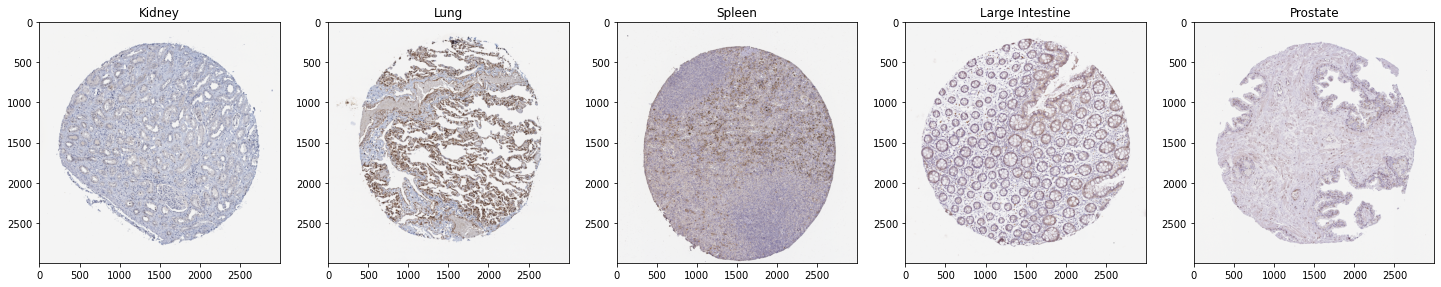

In [5]:
# preview of the organs images
plt.figure()

f, ax = plt.subplots(1,5)
imgs = ['62.tiff', '127.tiff', '144.tiff', '203.tiff', '435.tiff']
organs = ['Kidney', 'Lung', 'Spleen', 'Large Intestine', 'Prostate']
cont = 0
for img in imgs:
    ax[cont].imshow(io.imread(images_dir + img))
    ax[cont].set_title(organs[cont])
    cont += 1


El conjunto de datos para la elaboración de análisis de los tejidos funcionales de los órganos fue obtenido mediante la página de Kaggle de la competencia *Hacking the Human Body*. Los datos proporcionados constan de 351 observaciones (con sus respectivas imágenes para el análisis, de las cuales se puede observar una previsualización en la imagen anterior) y 10 variables, en las cuales se describe tanto información de las imágenes como el sexo y la edad del donador. Los organos provistos para el análisis son: riñón, pulmón, bazo, intestino grueso y próstata.

In [6]:
data.describe()

,img_height,img_width,pixel_size,tissue_thickness,age
count,351.000000,351.000000,3.510000e+02,351.0,351.000000
mean,2978.364672,2978.364672,4.000000e-01,4.0,60.364672
std,90.962085,90.962085,1.111808e-16,0.0,16.013327
min,2308.000000,2308.000000,4.000000e-01,4.0,21.000000
25%,3000.000000,3000.000000,4.000000e-01,4.0,55.000000
50%,3000.000000,3000.000000,4.000000e-01,4.0,60.000000
75%,3000.000000,3000.000000,4.000000e-01,4.0,73.000000
max,3070.000000,3070.000000,4.000000e-01,4.0,84.000000


Al realizar un análisis estadístico general de las variables en el conjunto de datos se puede notar que el tamaño promedio de las imágenes es aproximadamente 2978 pixeles, con un tamaño de pixel promedio de 0.4 y una edad promedio de donadores de 60 años.

## Normalización de imágenes
La normalización es un aspecto clave al momento de utilizar algoritmos de aprendizaje de máquina. Al igual que al trabajar con datos que no son imágenes es necesaria la normalización para garantizar que los algoritmos aprendan de manera equivalente todas las características delos datos, al momento de trabajar con imágenes es necesaria la normalización para garantizar que los pixeles se encuentren distribuidos de manera similar, así como también para hacer la convergencia del algoritmo mucho más rápida al momento de entrenar los modelos. Debido a que las imágenes de los órganos proporcionadas se encuentran fuera de un rango de 0 a 1 es necesario hacer normalización de las mismas.

In [7]:
def normalize_images(image):
    # Normalize all the pixel values of the images to be from 0 to 1
    normalized_img = image  / image.max()
    return normalized_img

1.0

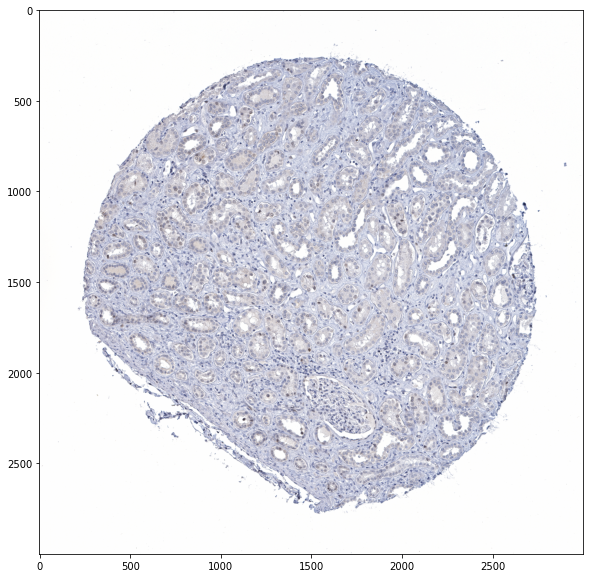

In [8]:
img = io.imread(images_dir + imgs[0])
norm_img = normalize_images(img)
plt.imshow(norm_img)
norm_img.max()

In [9]:
for img in train_images:
    print(img)

10044.tiff
10274.tiff
10392.tiff
10488.tiff
10610.tiff
10611.tiff
10651.tiff
10666.tiff
10703.tiff
10892.tiff
10912.tiff
10971.tiff
10992.tiff
11064.tiff
1123.tiff
11448.tiff
11497.tiff
1157.tiff
11629.tiff
11645.tiff
11662.tiff
1168.tiff
1184.tiff
11890.tiff
12026.tiff
12174.tiff
1220.tiff
12233.tiff
12244.tiff
1229.tiff
12452.tiff
12466.tiff
12471.tiff
12476.tiff
12483.tiff
127.tiff
12784.tiff
12827.tiff
13034.tiff
13189.tiff
13260.tiff
13396.tiff
13483.tiff
13507.tiff
13942.tiff
14183.tiff
14388.tiff
14396.tiff
144.tiff
14407.tiff
14674.tiff
14756.tiff
1500.tiff
15005.tiff
15067.tiff
15124.tiff
15192.tiff
15329.tiff
15499.tiff
15551.tiff
15706.tiff
15732.tiff
15787.tiff
15842.tiff
15860.tiff
16149.tiff
16163.tiff
16214.tiff
16216.tiff
16362.tiff
164.tiff
16564.tiff
16609.tiff
16659.tiff
16711.tiff
16728.tiff
16890.tiff
1690.tiff
17126.tiff
17143.tiff
17187.tiff
1731.tiff
17422.tiff
17455.tiff
17828.tiff
18121.tiff
18401.tiff
18422.tiff
18426.tiff
18445.tiff
18449.tiff
1850.tiff
1877

# Análisis exploratorio
Descripción de cuántas variables y observaciones hay disponibles, así como el tipo de cada una de las variables

Dentro del conjunto de datos se tienen 10 variables. Estas se pueden clasificar como:

**Cuantitativas**
- img_height: describe la altura de la imagen en pixeles
- img_width: describe el ancho de la imagen en pixeles
- pixel_size: define el tamaño del pixel de la imagen
- tissue_thickness: define el espesor de la muestra medida en micrómetros
- rle: formato de puntos que definen los límites de las máscaras poligonales en las cuales se encuentran unidades de tejido funcional
- edad: define la edad del donador

**Cualitativas**
- organ: describe el órgano asociado a la observación
- sex: define el sexo del donador
- data_source: define el proveedor de la imagen, es decir de dónde se obtuvo

## Estudio de las variables
Uso de estadística descriptiva, gráficos exploratorios como histogramas, diagramas de cajas y bigotes, gráficos de dispersión que ayudan a explicar los datos. Elaboración de gráficos de barra, tabla de frecuencias y proporciones.

### Visualización de unidades de tejido funcional
Como bien se ha descrito anteriormente, el objetivo del análisis de las imágenes de órganos, es el poder encontrar los límites en los cuales se encuentran unidades de tejido funcional. Para el aprendizaje de los modelos en el conjunto de entrenamiento se provee una lista de límites de la máscara de los polígonos en las áreas que se encuentran dichos tejidos. A continuación se muestran ciertos órganos con sus respectivas unidades de tejido funcional.

<Figure size 1080x1800 with 0 Axes>

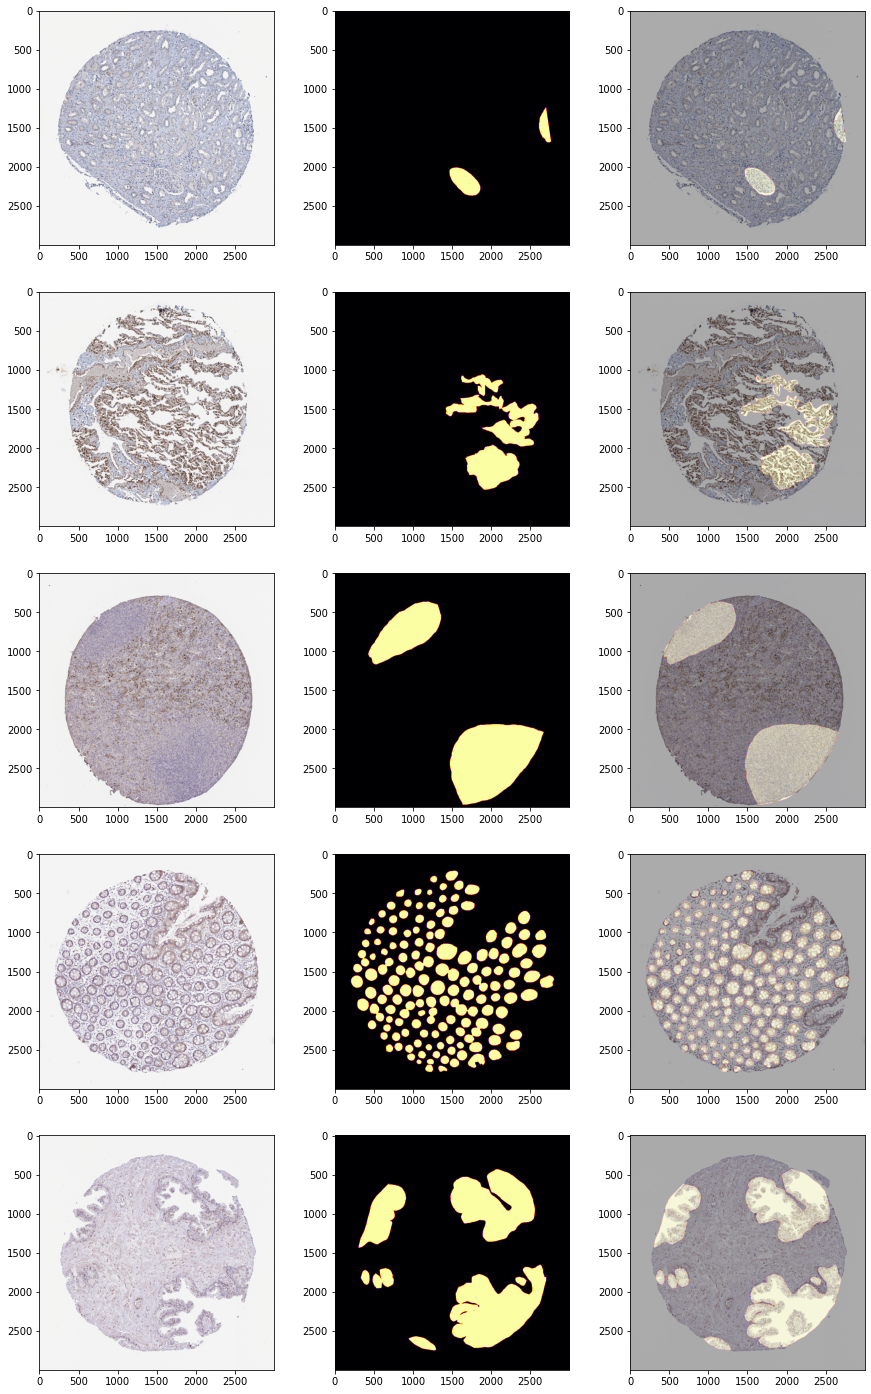

In [10]:
# preview of the organs images
plt.rcParams['figure.figsize']=(15, 25)
plt.figure()

f, ax = plt.subplots(5,3)
column = 0
for row in range(5):
        # ax[row].set_title(organs[row])
        img = io.imread(images_dir + imgs[row])
        ax[row][0].imshow(img)
        img_id = int(imgs[row].split('.')[0])
        rle = data.loc[img_id,'rle']
        mask = rle2mask(rle, img.shape[:2])
        ax[row][1].imshow(mask, cmap='inferno')
        ax[row][2].imshow(img)
        ax[row][2].imshow(mask, cmap='inferno', alpha=0.3)
        


<Figure size 1080x576 with 0 Axes>

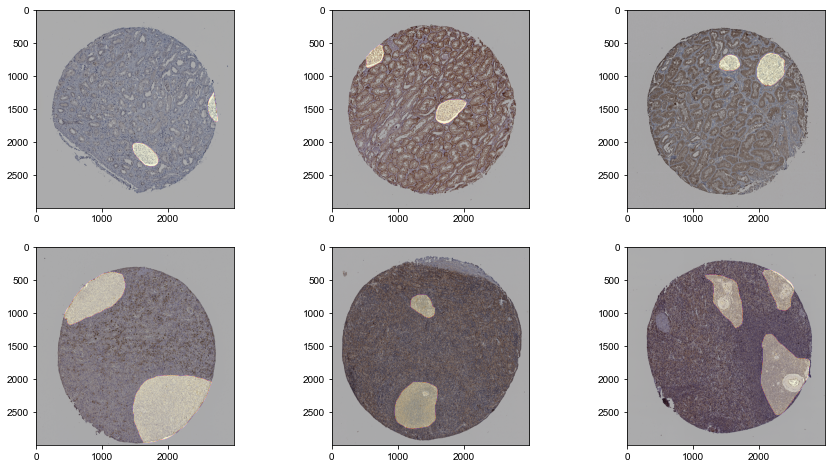

In [11]:
plt.rcParams['figure.figsize']=(15, 8)
plt.figure()

organs = [['62.tiff', '164.tiff', '660.tiff'],
        ['144.tiff', '1123.tiff', '2079.tiff']]

f, ax = plt.subplots(2,3)

sns.set_theme(style='white', palette='deep')
for row in range(2):
    for column in range(3):
        # ax[row].set_title(organs[row])
        img = io.imread(images_dir + organs[row][column])
        img_id = int(organs[row][column].split('.')[0])
        rle = data.loc[img_id,'rle']
        mask = rle2mask(rle, img.shape[:2])
        ax[row][column].imshow(img)
        ax[row][column].imshow(mask, cmap='inferno', alpha=0.3)

### ¿Cuál es la distribución de órganos en los datos de entrenamiento?
Como se puede observar en la **figura 1** tanto el riñón como la próstata son los órganos de los cuales se tiene una mayor cantidad de imágenes para analizar, ya que aproximadamente se tienen 95 imágenes de cada uno.

Text(0.5, 1.0, 'Figura 1. Distribución de los órganos disponibles para análisis')

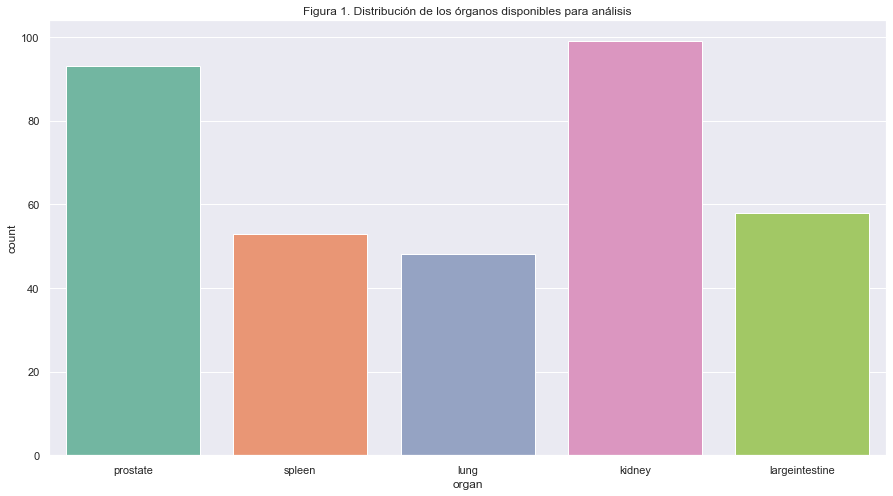

In [12]:
sns.set_theme(style='darkgrid', palette='Set2')
plt.rcParams['figure.figsize']=(15, 8)
sns.countplot(x=data['organ'])
plt.title('Figura 1. Distribución de los órganos disponibles para análisis')

### ¿Cuál es la proporción de donadores hombres y mujeres?
Tal y como se muestra en la **figura 2** aproximadamente un 65% de la información de entrenamiento ha sido proporcionada por donadores hombres, lo cual va de la mano con lo observado en la **figura 1 y 3** ya que uno de los órganos de los cuales se tiene una mayor cantidad de imágenes es la próstata, el cual es un órgano que únicamente se encuentra presente en los hombres.

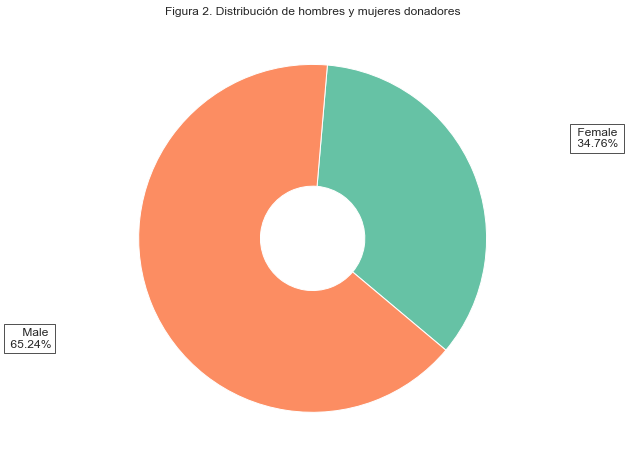

Text(0.5, 1.0, 'Figura 3. Distribución de los órganos disponibles para análisis separados por sexo')

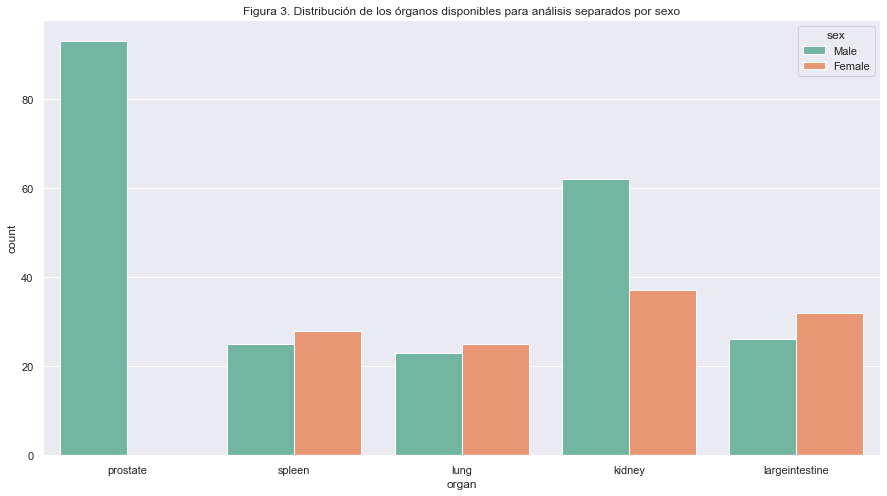

In [13]:
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))
sex = data.groupby(['sex'])['sex'].count()
total = sex[0] + sex[1]
wedges, texts = ax.pie(sex, wedgeprops=dict(width=0.7), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.75)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(' ' + sex.index[i] + ' \n ' + str(round((sex[i]/total) * 100,2)) + '%', xy=(x, y), xytext=(1.5*np.sign(x), 1.5*y),
                horizontalalignment=horizontalalignment, **kw)
plt.title('Figura 2. Distribución de hombres y mujeres donadores')
plt.show()

sns.countplot(data=data, x='organ', hue='sex')
plt.title('Figura 3. Distribución de los órganos disponibles para análisis separados por sexo')


### ¿Cuál es la edad más predominante entre los donadores?
Se puede observar que las edades predominantes de los donadores son 55, 57, 61 y 84. Si bien existen edades predominantes, tal y como se puede notar en la **figura 4** la cantidad de donadores de una edad en particular oscila entre 15 a 25 aproximadamente, lo cual proporciona un conjunto de datos bastante balanceado al menos en cuento a la edad.

Text(0.5, 1.0, 'Figura 4. Edad de los donadores')

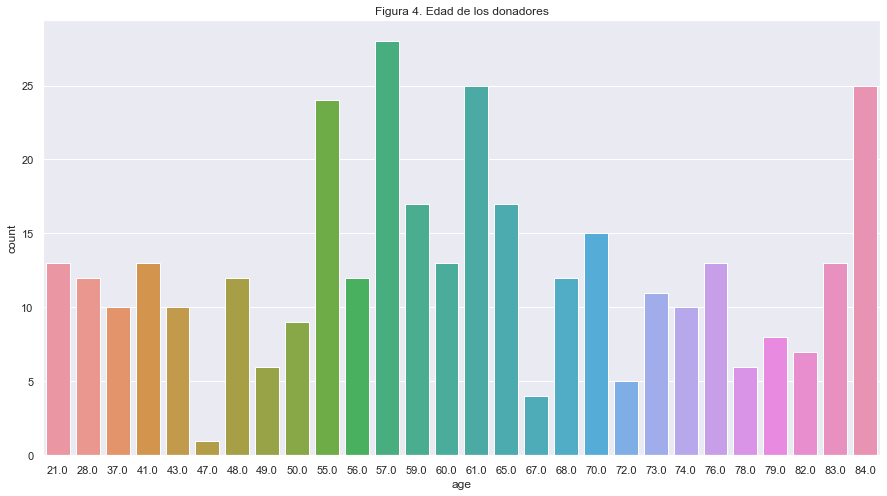

In [14]:
sns.countplot(x=data['age'])
plt.title('Figura 4. Edad de los donadores')

Text(0.5, 1.0, 'Figura 5. Distribución de los órganos disponibles para análisis por sexo')

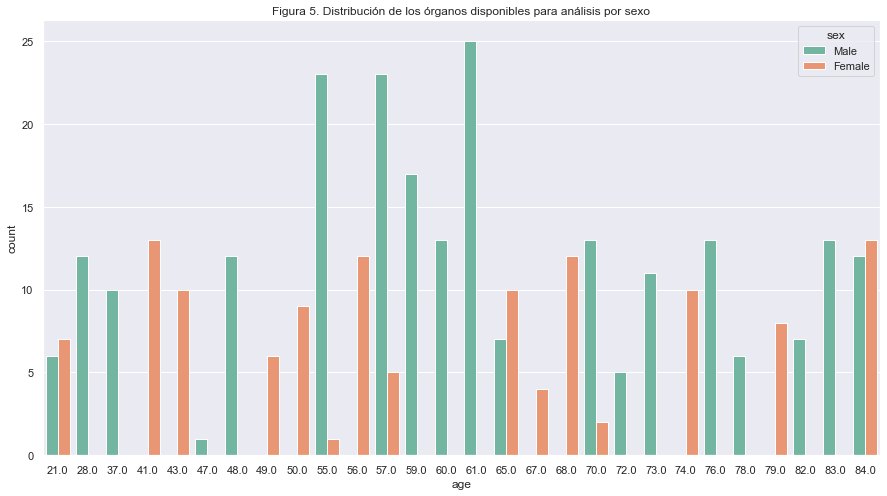

In [15]:
plt.rcParams['figure.figsize']=(15, 8)
sns.countplot(data=data, x='age', hue='sex')
plt.title('Figura 5. Distribución de los órganos disponibles para análisis por sexo')

## Correlación entre variables
Analizan las correlaciones entre las variables, tratan de explicar los datos atípicos (outliers) y toman decisiones acertadas ante la presencia de valores faltantes. Crucen las variables que consideren son las más importantes para hallar los elementos clave que puedan llevar a comprender lo que está causando el problema encontrado.

Percentage of the image covered by the mask:  16.2 %


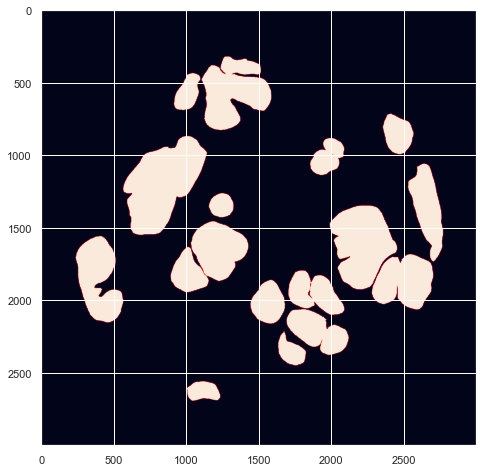

In [79]:

rle = data.iloc[1]['rle']

image = rle2mask(rle, (3000, 3000))

plt.imshow(image)

print('Percentage of the image covered by the mask: ', round(image.sum() / (3000 * 3000) * 100, 2), '%')


Para poder obtener la cantidad de ftu de cada celula se podemos el porcentaje de area de esta en cada una de las imagenes asi como se muestra en el resultado anterior.

In [80]:

data['size'] = data[['rle', 'img_width','img_height']].apply(lambda x: round(rle2mask(x['rle'], (x['img_width'], x['img_height'])).sum() / (x['img_width']* x['img_height']), 4), axis=1)

In [67]:
data

,organ,data_source,img_height,img_width,pixel_size,tissue_thickness,rle,age,sex,size
id,,,,,,,,,,
10044,prostate,HPA,3000,3000,0.4,4,1459676 77 1462675 82 1465674 87 1468673 92 14...,37.0,Male,0.346844
10274,prostate,HPA,3000,3000,0.4,4,715707 2 718705 8 721703 11 724701 18 727692 3...,76.0,Male,0.377358
10392,spleen,HPA,3000,3000,0.4,4,1228631 20 1231629 24 1234624 40 1237623 47 12...,82.0,Male,0.204519
10488,lung,HPA,3000,3000,0.4,4,3446519 15 3449517 17 3452514 20 3455510 24 34...,78.0,Male,0.011880
10610,spleen,HPA,3000,3000,0.4,4,478925 68 481909 87 484893 105 487863 154 4908...,21.0,Female,0.113906
...,...,...,...,...,...,...,...,...,...,...
9517,kidney,HPA,3000,3000,0.4,4,1611763 11 1614753 29 1617750 35 1620746 43 16...,61.0,Male,0.027487
9769,kidney,HPA,3070,3070,0.4,4,4030400 28 4033466 34 4036526 48 4039594 54 40...,28.0,Male,0.028884
9777,largeintestine,HPA,3000,3000,0.4,4,538473 13 541468 22 544463 30 547461 35 550459...,84.0,Male,0.515723


In [68]:
#make a list of the cuantitative variables
QUANTITATIVES = ["img_height", "img_width", "pixel_size", "tissue_thickness", "age", "size"]
corr = data[QUANTITATIVES].astype(float).corr()

<AxesSubplot:>

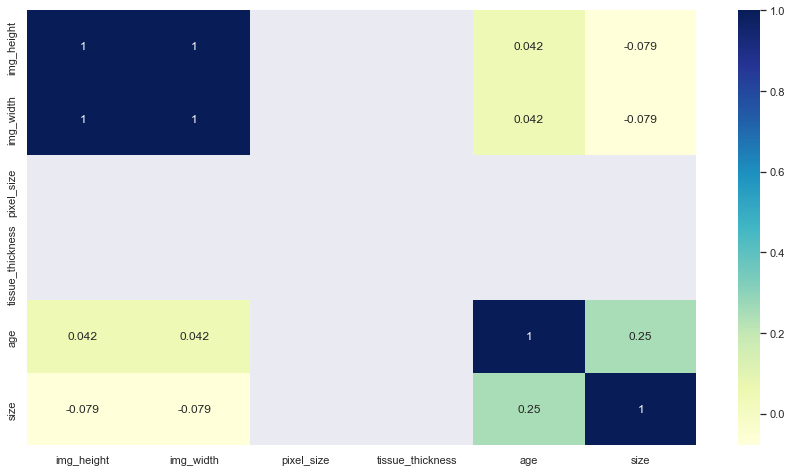

In [69]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap="YlGnBu")

Algo que podemos observar con estos datos es que los valores para el tamaño del pixel y el grozor del tejido es constante a lo largo de todos los datos. Además de que la altura de las imagenes será siempre igual al grosor, diciendonos así con esta correlación de 1 que todas las imagenes están a escala 1:1. Además no se encuentra ninguna relación de correlación al comparar la edad y el tamaño de la imagen. Además vemos una leve correlación positiva entre edad y area que cubre las ftu, por lo que podemos decir que si aumenta la edad hay una leve tendencia a que aumente el area de la ftu de la celula

In [90]:
data.groupby('sex')['size'].mean()

sex
Female    0.077629
Male      0.110961
Name: size, dtype: float64

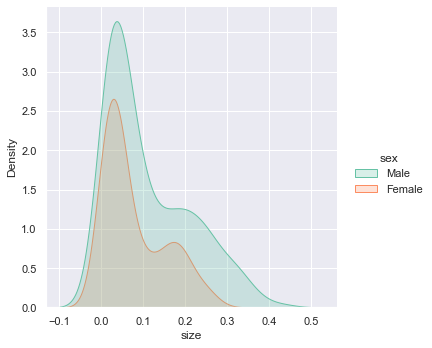

In [88]:
#histogram of size grouped by organ
sns.displot(data=data, x='size', hue='sex', kind='kde', fill=True)

En base a las medias y a las distribuciones mostradas con anterioridad, podemos decir que las areas de las unidades funcionales del tejido de los hombres tienden a ser mayores a las de las mujeres.

#### Filtrado de Outliers

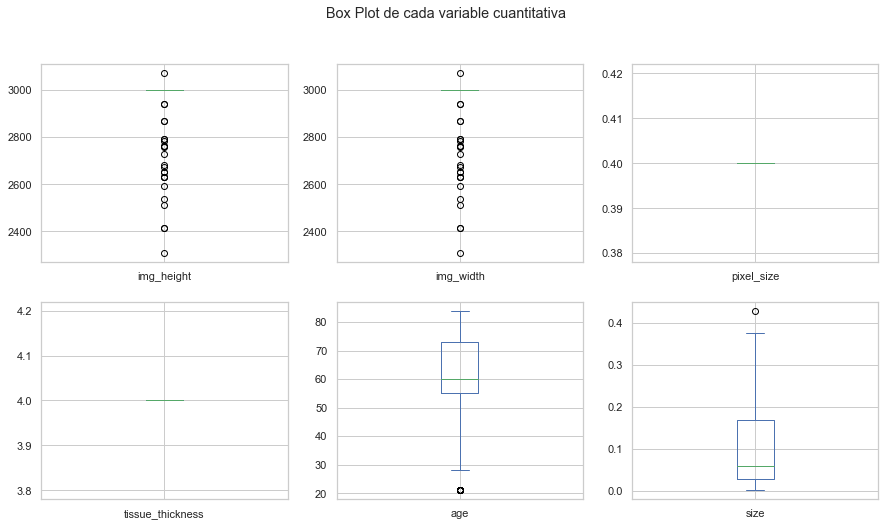

In [92]:

sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize']=(15, 8)
data[QUANTITATIVES].astype(float).plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False, figsize=(15,8), title='Box Plot de cada variable cuantitativa')
plt.savefig('organ_box')
plt.show()


Dentro de nuestras variables, basadas en el gráfico boxplot podemos obtener datos atípicos principalmente de la edad, teniendo puntos atípicos de edades al rededor de 20 años y en el area que cubre las ftus, teniendo datos atípicos superiores a 0.4. Por lo que se procede a utilizar el rango intercuartil para el filtrado de outliers

In [93]:
# filtrado basado en el tamaño del ftu
Q1 = data['size'].quantile(0.25)
Q3 = data['size'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['size'] >= Q1 - 1.5 * IQR) & (data['size'] <= Q3 + 1.5 * IQR)]
del Q1, Q3, IQR

# Filtrado basado en la edad
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['age'] >= Q1 - 1.5 * IQR) & (data['age'] <= Q3 + 1.5 * IQR)]
del Q1, Q3, IQR


In [95]:
print('Dimensiones del dataset: ', data.shape)

Dimensiones del dataset:  (337, 10)


Basado en el rango intercuartil se filtran los datos y ahora se cuentan con 337 datos filtrados

# Hallazgos y conclusiones
Conclusiones con los hallazgos encontrados durante el análisis exploratorio.

Al observar gráficamente la locación de las unidades funcionales de distintos órganos, se pudo notar que en cada órgano las unidades de tejido funcional a la vista se perciben de forma distinta, lo cual es algo esperado, ya que cada órgano tiene unidades funcionales diferentes compuestas por células particulares que tienen algo en común. Algo interesante a resaltar es que en promedio se puede considerar que se tiene la misma cantidad de locaciones de unidades funcionales, en el caso de los riñones, se puede decir que en promedio tienen 2 unidades funcionales al igual que el bazo.

Por otro lado, las áreas en las que se encuentran las unidades funcionales comparten caraterísticas dentro de los mismos órganos, como en el caso del bazo, en el cual se puede notar que las unidades de tejido funcional se pueden reconocer a la vista como las áreas en las cuales no están presentes fragmentos de color café, de igual forma, en el caso del intestino estás áreas se pueden reconocer como circunferencias que tienen un color más oscuro en el borde, o en el caso de la próstata en la cual las unidades de tejido funcional son áreas con borde oscuro pero por dentro parecen tener un color bastante claro.